# Patient Dementia Status vs Health and Lifestyle Factors #

Objective:  
- Examine whether dementia is more closely correlated with "nature vs nurture"  
- Explore possible correlations between dementia and:  
    - "nature" (APOE-ε4—gene positivity, family history, age)
    - "nurture" (education level, smoking status, physical activity)  
    - other conditions and general health that cannot be specifically attributed to nature or nurture (weight, cognitive test scores)  

Dataset source: Kaggle https://www.kaggle.com/datasets/timothyadeyemi/dementia-patient-health-dataset  
"This dataset sample comprises various health-related parameters and lifestyle factors of individuals, with a focus on their Dementia status. The data includes information on alcohol level, heart rate, blood oxygen level, body temperature, weight, MRI delay, prescription details, dosage in milligrams, age, education level, dominant hand, gender, family history, smoking status, APOE_ε4 status, physical activity, depression status, cognitive test scores, medication history, nutrition diet, sleep quality, chronic health conditions, and dementia status. Each row represents a unique individual, and the dataset captures a diverse range of attributes, offering insights into the correlation between health indicators, lifestyle choices, and medical conditions. The features provide a comprehensive overview of the subjects' overall health, allowing for potential analysis and exploration of patterns related to diabetes and associated factors."

## Part 1: Data Import, Cleaning, and Processing ##

### DATA IMPORT AND OVERVIEW ###

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import MeanShift, SpectralClustering
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings 
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
df = pd.read_csv('dementia_patients_health_data.csv')

# Display column names/data types and first 10 rows of dataset
print(df.dtypes)
df.head(10)

Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
5,1,0.114028,94,94.546754,36.678071,66.592329,21.154863,Rivastigmine,1.5,67,...,Former Smoker,Positive,Mild Activity,Yes,1,No,Low-Carb Diet,Poor,Diabetes,1
6,1,0.016194,90,96.423361,37.024630,83.976553,11.350612,Donepezil,10.0,87,...,Never Smoked,Positive,Mild Activity,No,7,No,Mediterranean Diet,Poor,Diabetes,1
7,0,0.161158,98,92.007370,36.050294,69.653564,30.339413,NaN,NaN,66,...,Former Smoker,Negative,Mild Activity,No,9,Yes,Low-Carb Diet,Poor,Hypertension,0
8,0,0.015754,69,99.859490,36.955259,53.725078,36.629687,NaN,NaN,66,...,Former Smoker,Positive,Mild Activity,No,10,Yes,Mediterranean Diet,Poor,NaN,0
9,1,0.097340,64,90.319068,36.396286,58.366698,49.175758,Rivastigmine,3.0,87,...,Former Smoker,Positive,Sedentary,Yes,7,Yes,Balanced Diet,Good,Diabetes,1


In [3]:
# Display numerical data info
df.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [4]:
# Display unique values in categorical columns
print('------------Smoking Status Categories:---------------')
print(df.Smoking_Status.unique())

print('\n----------Physical Activity Categories:-------------')
print(df.Physical_Activity.unique())

print('\n------------Nutrition/Diet Categories:--------------')
print(df.Nutrition_Diet.unique())

print('\n------------Sleep Quality Categories:---------------')
print(df.Sleep_Quality.unique())

print('\n------Chronic Health Conditions Categories:---------')
print(df.Chronic_Health_Conditions.unique())

print('\n-------------Prescription Categories:---------------')
print(df.Prescription.unique())

print('\n------------Education Level Categories:--------------')
print(df.Education_Level.unique())

print('\n-------------Gender Categories:-------------')
print(df.Gender.unique())


------------Smoking Status Categories:---------------
['Current Smoker' 'Former Smoker' 'Never Smoked']

----------Physical Activity Categories:-------------
['Sedentary' 'Moderate Activity' 'Mild Activity']

------------Nutrition/Diet Categories:--------------
['Low-Carb Diet' 'Mediterranean Diet' 'Balanced Diet']

------------Sleep Quality Categories:---------------
['Poor' 'Good']

------Chronic Health Conditions Categories:---------
['Diabetes' 'Heart Disease' 'Hypertension' nan]

-------------Prescription Categories:---------------
[nan 'Galantamine' 'Donepezil' 'Memantine' 'Rivastigmine']

------------Education Level Categories:--------------
['Primary School' 'Secondary School' 'No School' 'Diploma/Degree']

-------------Gender Categories:-------------
['Female' 'Male']


### DATA CLEANING  ###  

- Change nans to None in Chronic Health Conditions column       

- Convert metric to imperial units for columns:  
    - Body temperature: °F = (9/5 * °C) + 32  
    - Weight: lbs = kg * 2.2046  
    
- Ordinal encoding (convert categorical to numerical) for columns:  
    - Smoking status: 1=never, 2=former, 3=current  
    - Physical activity: 1=sedentary, 2=mild, 3=moderate  
    - Education level: 1=No School, 2=Primary School, 3=Secondary School, 4=Diploma/Degree
    - Chronic Health Conditions: 1=None, 2=Diabetes, 3=Heart Disease, 4=Hypertension 
    - Nutrition/Diet: 1=Low-Carb Diet, 2=Mediterranean Diet, 3=Balanced Diet
    - APOE_ε4 status: 1=negative, 2=positive

- Research meaning, units, and scales, and determine relevance of certain columns: 
    - Alcohol level: possibly referring to BAC?:  
    "Sober: 0.0 percent BAC  
    Legally intoxicated: .08 percent BAC  
    Very impaired: .08–0.40 percent BAC. At this blood alcohol level, you may have difficulty walking and speaking. Other symptoms may include confusion, nausea, and drowsiness.  
    At risk for serious complications: Above .40 percent BAC. At this blood alcohol level, you may be at risk for coma or death."  
    https://medlineplus.gov/lab-tests/blood-alcohol-level/  
    - MRI Delay: time between MRI scans  
    - APOE_ε4: apolipoprotein E gene that increases the risk of Alzheimers:  
    "One copy of the APOE gene comes from the mother and another from the father. Having at least one APOE e4 gene doubles or triples the risk of getting Alzheimer's disease. Some people have two APOE e4 genes, one from each parent. Having two genes increases the risk of getting Alzheimer's disease even more, about eight- to twelvefold."  
    https://www.mayoclinic.org/diseases-conditions/alzheimers-disease/in-depth/alzheimers-genes/art-20046552#:~:text=Having%20at%20least%20one%20APOE,%2C%20about%20eight%2D%20to%20twelvefold. 
    - Cognitive test scores: referring to 10-CS:   
    "The 10-CS, combining three-item temporal orientation, semantic verbal fluency, and three-word recall tests,  
    classified patients as having normal cognition (≥8 points), possible (6–7 points), or probable cognitive  
    impairment (≤5) points." https://agsjournals.onlinelibrary.wiley.com/doi/pdf/10.1111/jgs.18091  

- Drop columns (unclear/unusable): 
    - MRI_Delay  
    - Medication_History
    - AlcoholLevel
- Drop columns (not using for this or future analysis):  
    - Diabetic, Prescription, Dosage in mg, Dominant_Hand, Sleep_Quality  

- Divide dataset into 2: subsets of patients 1) with dementia and 2) without dementia


In [5]:
# Drop unusable/columns not using in this or future analysis
df.drop(columns=['AlcoholLevel', 'MRI_Delay', 'Medication_History', 'Diabetic',
                 'Prescription', 'Dosage in mg', 'Dominant_Hand', 'Sleep_Quality'], inplace=True)

In [6]:
# Fill nans with 'None' for Chronic Health Conditions column
df.fillna({'Chronic_Health_Conditions' :'None'}, inplace=True)

In [7]:
# Display new set of unique values in Chronic Health Conditions column
print('\n------Chronic Health Conditions Categories:---------')
print(df.Chronic_Health_Conditions.unique())


------Chronic Health Conditions Categories:---------
['Diabetes' 'Heart Disease' 'Hypertension' 'None']


In [8]:
# Convert kg to lbs for weight column (lbs = kg * 2.2046)
df['Weight'] = (df['Weight'] * 2.2046).round(2)

# Convert C to F for BodyTemperature (°F = (9/5 * °C) + 32)
df['BodyTemperature'] = ((df['BodyTemperature'] * 9/5) + 32).round(2)

df.head(10)

,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,Age,Education_Level,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Nutrition_Diet,Chronic_Health_Conditions,Dementia
0,98,96.230743,97.20,126.91,60,Primary School,Female,No,Current Smoker,Negative,Sedentary,No,10,Low-Carb Diet,Diabetes,0
1,78,93.032122,97.13,125.29,61,Secondary School,Male,No,Former Smoker,Positive,Moderate Activity,No,1,Low-Carb Diet,Heart Disease,1
2,89,93.566504,99.19,131.74,69,Primary School,Male,Yes,Former Smoker,Negative,Moderate Activity,No,8,Mediterranean Diet,Heart Disease,0
3,60,93.906510,98.66,128.45,78,Secondary School,Female,Yes,Never Smoked,Negative,Mild Activity,Yes,5,Balanced Diet,Hypertension,1
4,67,97.508994,96.91,149.26,77,Secondary School,Male,Yes,Never Smoked,Positive,Mild Activity,No,0,Low-Carb Diet,Diabetes,1
5,94,94.546754,98.02,146.81,67,No School,Male,No,Former Smoker,Positive,Mild Activity,Yes,1,Low-Carb Diet,Diabetes,1
6,90,96.423361,98.64,185.13,87,Primary School,Male,No,Never Smoked,Positive,Mild Activity,No,7,Mediterranean Diet,Diabetes,1
7,98,92.007370,96.89,153.56,66,Secondary School,Female,No,Former Smoker,Negative,Mild Activity,No,9,Low-Carb Diet,Hypertension,0
8,69,99.859490,98.52,118.44,66,Secondary School,Female,No,Former Smoker,Positive,Mild Activity,No,10,Mediterranean Diet,None,0
9,64,90.319068,97.51,128.68,87,Diploma/Degree,Female,No,Former Smoker,Positive,Sedentary,Yes,7,Balanced Diet,Diabetes,1


In [9]:
# Convert select categorical columns to ordinal scale

# Address FutureWarning: opt in to future behavior
pd.set_option('future.no_silent_downcasting', True)

# Convert Smoking Status to ordinal scale
# (1=never smoked, 2=former smoker, 3=current smoker)
smoke_map = {'Never Smoked':1, 'Former Smoker':2, 'Current Smoker':3}

df['Smoking Scale'] = df['Smoking_Status'].replace(smoke_map)
df['Smoking Scale'] = df['Smoking Scale'].astype(int)

# Convert Physical Activity to ordinal scale
# (1=sedentary, 2=mild activity, 3=moderate activity)
activity_map = {'Sedentary':1, 'Mild Activity':2, 'Moderate Activity':3}

df['Activity Scale'] = df['Physical_Activity'].replace(activity_map)
df['Activity Scale'] = df['Activity Scale'].astype(int)

# Convert Education Level to ordinal scale
# (1=No School, 2=Primary School, 3=Secondary School, 4=Diploma/Degree)
edu_map = {'No School':1, 'Primary School':2, 'Secondary School':3, 'Diploma/Degree':4}

df['Education Scale'] = df['Education_Level'].replace(edu_map)
df['Education Scale'] = df['Education Scale'].astype(int)

# Convert Chronic Health Conditions to ordinal scale
# (1=None, 2=Diabetes, 3=Heart Disease, 4=Hypertension)
health_map = {'None':1, 'Diabetes':2, 'Heart Disease':3, 'Hypertension':4}

df['Health Scale'] = df['Chronic_Health_Conditions'].replace(health_map)
df['Health Scale'] = df['Health Scale'].astype(int)

# Convert Nutrition/Diet to ordinal scale
# (1=Low-Carb Diet, 2=Mediterranean Diet, 3=Balanced Diet)
diet_map = {'Low-Carb Diet':1, 'Mediterranean Diet':2, 'Balanced Diet':3}

df['Diet Scale'] = df['Nutrition_Diet'].replace(diet_map)
df['Diet Scale'] = df['Diet Scale'].astype(int)

# Convert APOE-ε4 Status to ordinal scale
# (1=Negative, 2=Positive)
apoe_map = {'Negative':1, 'Positive':2}

df['APOE_ε4 Scale'] = df['APOE_ε4'].replace(apoe_map)
df['APOE_ε4 Scale'] = df['APOE_ε4 Scale'].astype(int)

In [10]:
# Display numerical data info of cleaned dataset
print(df.dtypes)
df.describe()

HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
Age                            int64
Education_Level               object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Nutrition_Diet                object
Chronic_Health_Conditions     object
Dementia                       int64
Smoking Scale                  int32
Activity Scale                 int32
Education Scale                int32
Health Scale                   int32
Diet Scale                     int32
APOE_ε4 Scale                  int32
dtype: object


,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,Age,Cognitive_Test_Scores,Dementia,Smoking Scale,Activity Scale,Education Scale,Health Scale,Diet Scale,APOE_ε4 Scale
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,79.383000,95.226051,98.170840,163.84883,74.908000,6.383000,0.485000,1.638000,1.987000,2.453000,2.282000,2.002000,1.69400
std,12.107556,2.929262,0.777057,31.88673,9.095068,3.180633,0.500025,0.641379,0.805904,0.928792,0.931313,0.814038,0.46106
min,60.000000,90.010677,96.800000,110.38000,60.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,68.000000,92.875017,97.510000,135.33250,67.000000,4.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.00000
50%,79.000000,95.390420,98.210000,163.47000,75.000000,8.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
75%,90.000000,97.785111,98.830000,191.85000,83.000000,9.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000
max,100.000000,99.999230,99.490000,220.42000,90.000000,10.000000,1.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.00000


In [11]:
# Divide dataset into 2: subsets of patients with dementia and without dementia
df_yes = df[df['Dementia'] == 1].copy()
df_no = df[df['Dementia'] == 0].copy()

## Part 2: Exploratory Data Analysis ##

### MEAN, MEDIAN, MODE ###  

- Display mean, median, mode for numerical columns

In [12]:
# Calculate and display mean, median, and mode for all numeric columns of main df
print('--------------Mean--------------\n', df.mean(numeric_only=True))
print('\n------------Median-------------\n', df.median(numeric_only=True))
print('\n--------------Mode--------------\n')
df.mode(numeric_only=False)

--------------Mean--------------
 HeartRate                 79.383000
BloodOxygenLevel          95.226051
BodyTemperature           98.170840
Weight                   163.848830
Age                       74.908000
Cognitive_Test_Scores      6.383000
Dementia                   0.485000
Smoking Scale              1.638000
Activity Scale             1.987000
Education Scale            2.453000
Health Scale               2.282000
Diet Scale                 2.002000
APOE_ε4 Scale              1.694000
dtype: float64

------------Median-------------
 HeartRate                 79.00000
BloodOxygenLevel          95.39042
BodyTemperature           98.21000
Weight                   163.47000
Age                       75.00000
Cognitive_Test_Scores      8.00000
Dementia                   0.00000
Smoking Scale              2.00000
Activity Scale             2.00000
Education Scale            2.00000
Health Scale               2.00000
Diet Scale                 2.00000
APOE_ε4 Scale              2.

,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,Age,Education_Level,Gender,Family_History,Smoking_Status,APOE_ε4,...,Cognitive_Test_Scores,Nutrition_Diet,Chronic_Health_Conditions,Dementia,Smoking Scale,Activity Scale,Education Scale,Health Scale,Diet Scale,APOE_ε4 Scale
0,60.0,90.010677,96.92,128.68,66.0,Primary School,Female,Yes,Former Smoker,Positive,...,9.0,Mediterranean Diet,Diabetes,0.0,2.0,2.0,2.0,2.0,2.0,2.0
1,NaN,90.020210,97.71,NaN,71.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,90.026190,98.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,90.030763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,90.046661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,99.970985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,99.980907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,99.994866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,99.998802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Calculate and display mean, median, and mode for all numeric columns of df_yes
print('--------------Mean--------------\n', df_yes.mean(numeric_only=True))
print('\n------------Median-------------\n', df_yes.median(numeric_only=True))
print('\n--------------Mode--------------\n')
df_yes.mode(numeric_only=False)

--------------Mean--------------
 HeartRate                 79.536082
BloodOxygenLevel          95.010474
BodyTemperature           98.197979
Weight                   162.221134
Age                       74.325773
Cognitive_Test_Scores      3.620619
Dementia                   1.000000
Smoking Scale              1.519588
Activity Scale             2.000000
Education Scale            2.327835
Health Scale               2.249485
Diet Scale                 1.983505
APOE_ε4 Scale              1.896907
dtype: float64

------------Median-------------
 HeartRate                 80.000000
BloodOxygenLevel          95.052661
BodyTemperature           98.280000
Weight                   161.880000
Age                       73.000000
Cognitive_Test_Scores      4.000000
Dementia                   1.000000
Smoking Scale              2.000000
Activity Scale             2.000000
Education Scale            2.000000
Health Scale               2.000000
Diet Scale                 2.000000
APOE_ε4 Scale    

,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,Age,Education_Level,Gender,Family_History,Smoking_Status,APOE_ε4,...,Cognitive_Test_Scores,Nutrition_Diet,Chronic_Health_Conditions,Dementia,Smoking Scale,Activity Scale,Education Scale,Health Scale,Diet Scale,APOE_ε4 Scale
0,63.0,90.010677,98.66,111.32,61.0,Primary School,Female,No,Former Smoker,Positive,...,5.0,Mediterranean Diet,Diabetes,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,NaN,90.030763,NaN,117.99,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,90.088450,NaN,128.71,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,90.129750,NaN,129.59,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,90.145616,NaN,155.45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,NaN,99.902051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,NaN,99.937267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,NaN,99.965130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,NaN,99.970985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Calculate and display mean, median, and mode for all numeric columns of df_no
print('--------------Mean--------------\n', df_no.mean(numeric_only=True))
print('\n------------Median-------------\n', df_no.median(numeric_only=True))
print('\n--------------Mode--------------\n')
df_no.mode(numeric_only=False)

--------------Mean--------------
 HeartRate                 79.238835
BloodOxygenLevel          95.429070
BodyTemperature           98.145282
Weight                   165.381709
Age                       75.456311
Cognitive_Test_Scores      8.984466
Dementia                   0.000000
Smoking Scale              1.749515
Activity Scale             1.974757
Education Scale            2.570874
Health Scale               2.312621
Diet Scale                 2.019417
APOE_ε4 Scale              1.502913
dtype: float64

------------Median-------------
 HeartRate                 79.000000
BloodOxygenLevel          95.717094
BodyTemperature           98.170000
Weight                   164.970000
Age                       76.000000
Cognitive_Test_Scores      9.000000
Dementia                   0.000000
Smoking Scale              2.000000
Activity Scale             2.000000
Education Scale            2.000000
Health Scale               2.000000
Diet Scale                 2.000000
APOE_ε4 Scale    

,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,Age,Education_Level,Gender,Family_History,Smoking_Status,APOE_ε4,...,Cognitive_Test_Scores,Nutrition_Diet,Chronic_Health_Conditions,Dementia,Smoking Scale,Activity Scale,Education Scale,Health Scale,Diet Scale,APOE_ε4 Scale
0,68.0,90.020210,97.07,112.97,83.0,Primary School,Female,Yes,Never Smoked,Positive,...,9.0,Balanced Diet,Diabetes,0.0,1.0,2.0,2.0,2.0,3.0,2.0
1,93.0,90.026190,97.20,120.55,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,90.046661,97.26,127.34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,90.074966,97.42,128.68,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,90.075250,NaN,129.65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,NaN,99.956399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,NaN,99.970057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,NaN,99.980907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,NaN,99.998802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EXPLORATORY GRAPHS ###  

Visualize select health variables in relation to dementia status:  
- "nature" (APOE-ε4—gene positivity, family history, age)
- "nurture" (education level, smoking status, physical activity) 
- general health metrics (weight, cognitive test scores)       
  
Nature:

- Pie:  
    - APOE-ε4 status by dementia status
    - Family history by dementia status 
- Box and whisker:  
    - Age by dementia status  

Nurture: 
- Pie:
    - Smoking status by dementia status
- Stacked bar:  
    - Physical activity by dementia status
- Grouped bar:  
    - Average cognitive test scores by education level and dementia status  

Health metrics:
- Histogram:   
    - Distribution of patient weight in each dementia status 

In [15]:
# Create color palette for charts
colors = ['xkcd:royal purple', 'xkcd:amethyst', 'xkcd:baby purple', 'xkcd:pale lilac']

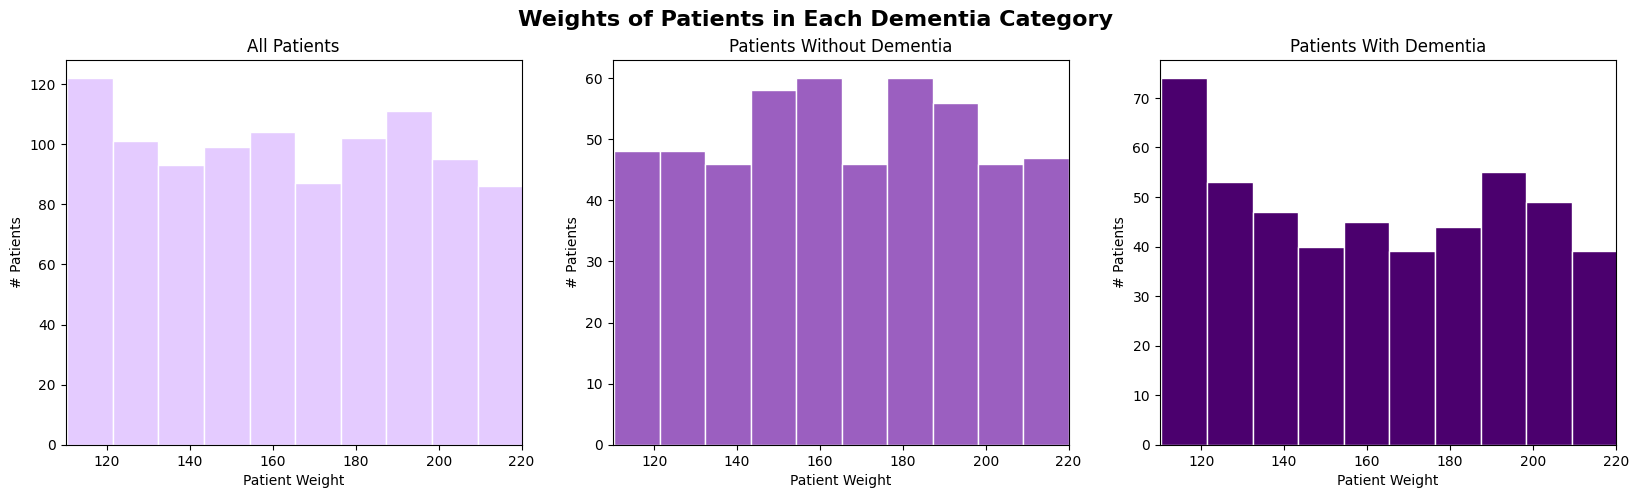

In [16]:
# Histograms of patient weight by dementia status

fig, ax = plt.subplots(1,3, figsize=(20,5))
fig.suptitle('Weights of Patients in Each Dementia Category', fontsize=16, weight='bold')

ax[0].hist(df['Weight'], bins=10, edgecolor='white', facecolor=colors[3])
ax[0].set(title='All Patients', xlim=(110,220))
ax[0].set_xlabel('Patient Weight')
ax[0].set_ylabel('# Patients')

ax[1].hist(df_no['Weight'], bins=10, edgecolor='white', facecolor=colors[1])
ax[1].set(title='Patients Without Dementia', xlim=(110,220))
ax[1].set_xlabel('Patient Weight')
ax[1].set_ylabel('# Patients')

ax[2].hist(df_yes['Weight'], bins=10, edgecolor='white', facecolor=colors[0])
ax[2].set(title='Patients With Dementia', xlim=(110,220))
ax[2].set_xlabel('Patient Weight')
ax[2].set_ylabel('# Patients')

plt.show()

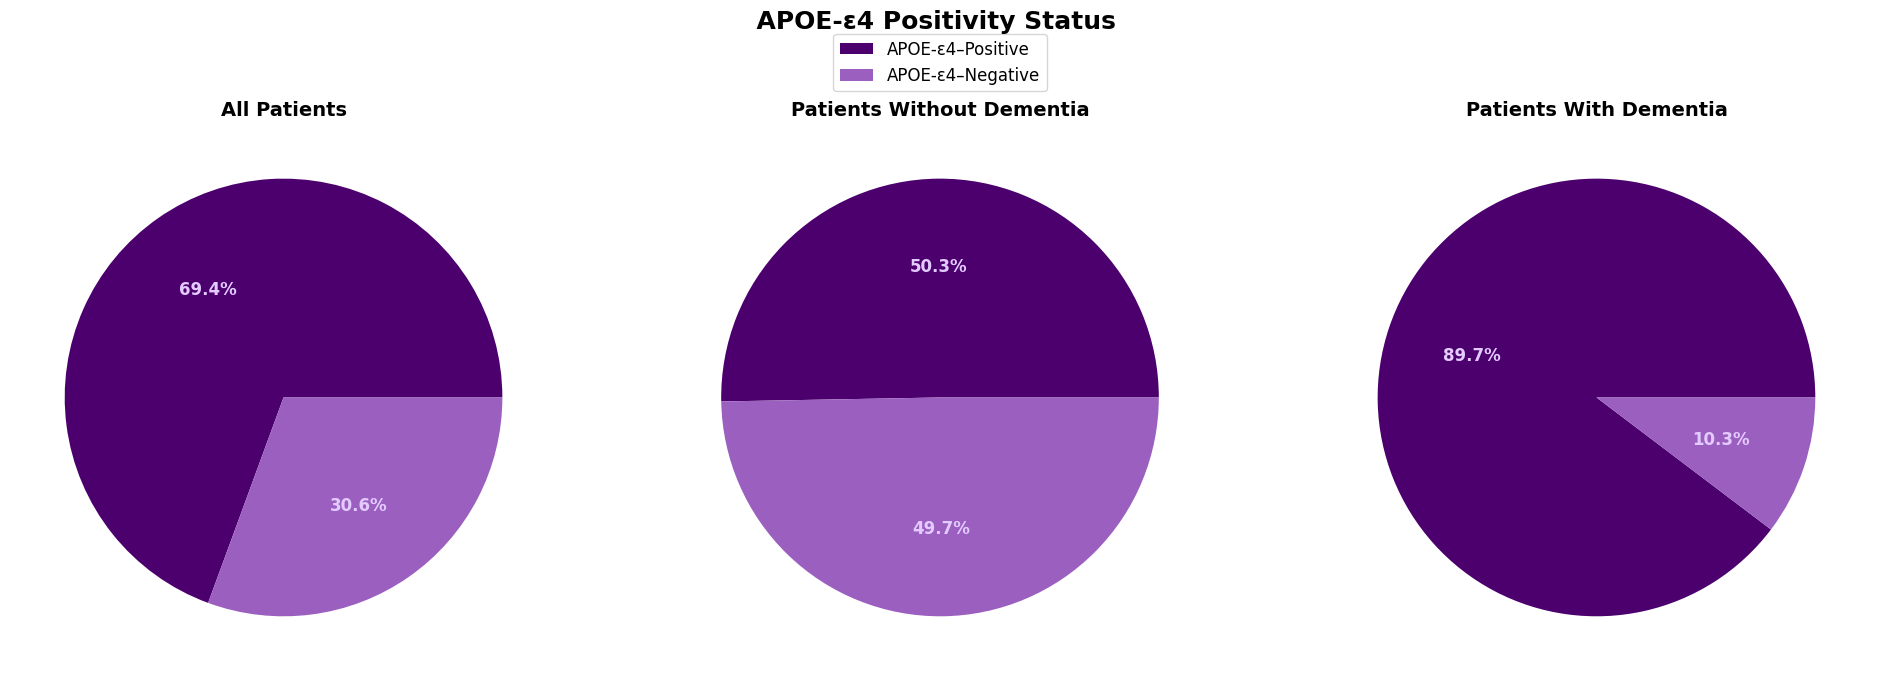

In [17]:
# Create pie charts comparing APOE_ε4-positive in total, dementia, and non-dementia dfs

# Category labels
labels = ['APOE-ε4–Positive', 'APOE-ε4–Negative']

# Total population data
all_values = df['APOE_ε4'].value_counts().values

# Non-dementia data
non_values = df_no['APOE_ε4'].value_counts().values

# Dementia data
yes_values = df_yes['APOE_ε4'].value_counts().values

# Create fig, ax, title
fig, ax = plt.subplots(1,3,figsize=(24,8))
fig.suptitle('      APOE-ε4 Positivity Status', fontsize=18, weight='bold')

# Pie chart of APOE_ε4 status in total population
_, _, autopcts = ax[0].pie(all_values, labels=labels, colors=colors, autopct='%1.1f%%', labeldistance=None)
plt.setp(autopcts, **{'color':colors[3], 'weight':'bold', 'fontsize':12})
ax[0].set_title('All Patients', weight='bold', fontsize=14)

# Pie chart of APOE_ε4 status in population without dementia, create legend for all charts
_, _, autopcts = ax[1].pie(non_values, labels=labels, colors=colors, autopct='%1.1f%%', labeldistance=None)
plt.setp(autopcts, **{'color':colors[3], 'weight':'bold', 'fontsize':12})
ax[1].set_title('Patients Without Dementia', weight='bold', fontsize=14)
ax[1].legend(bbox_to_anchor=(.5, 1.18), loc='upper center', fontsize=12)

# Pie chart of APOE_ε4 status in population with dementia
_, _, autopcts = ax[2].pie(yes_values, labels=labels, colors=colors, autopct='%1.1f%%', labeldistance=None)
plt.setp(autopcts, **{'color':colors[3], 'weight':'bold', 'fontsize':12})
ax[2].set_title('Patients With Dementia', weight='bold', fontsize=14)

plt.show()

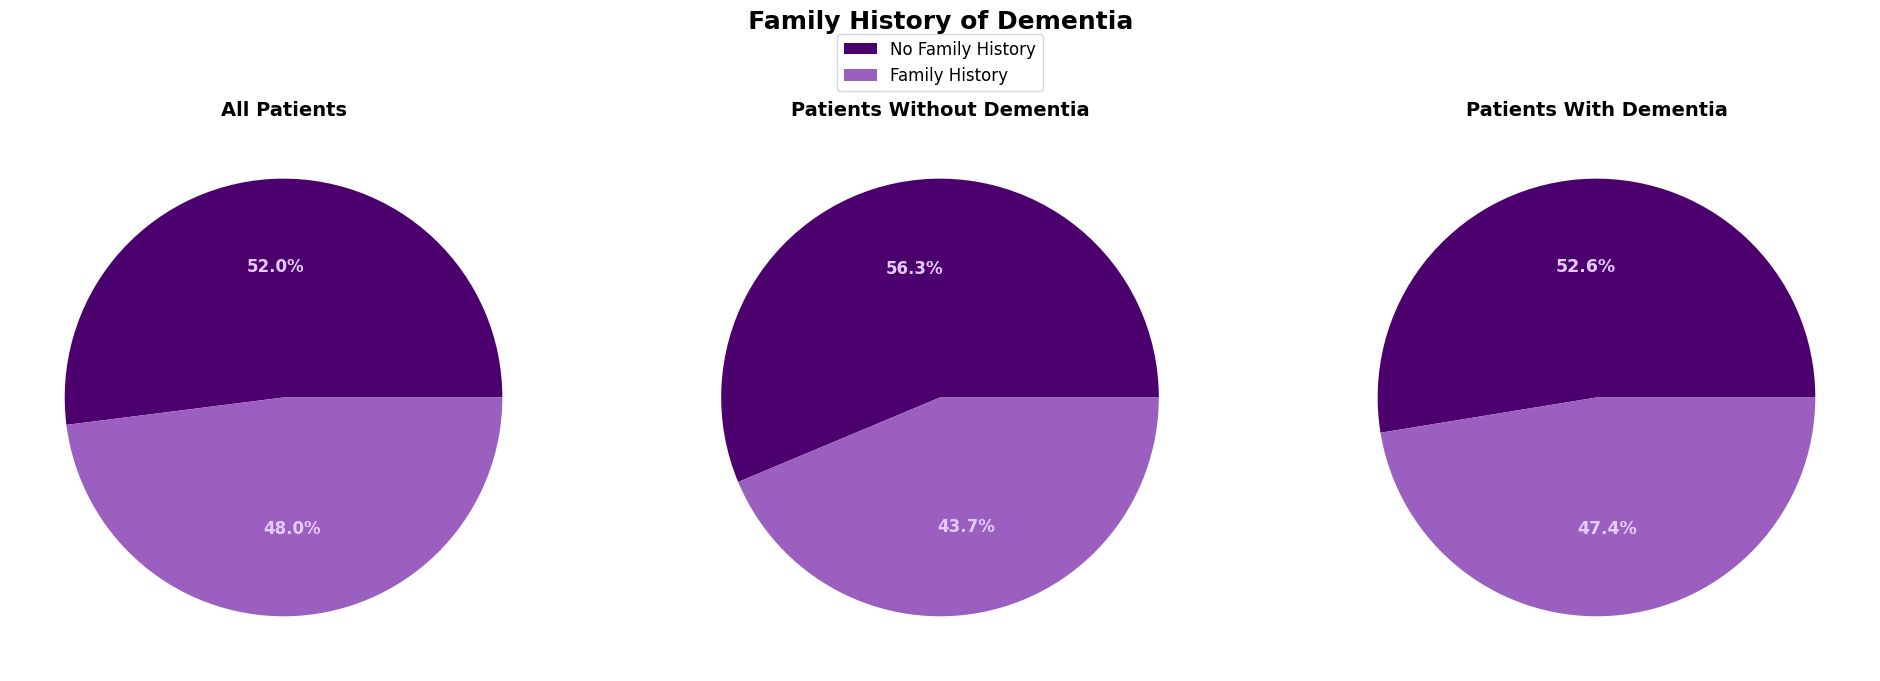

In [18]:
# Create pie charts comparing family history status in total, dementia, and non-dementia dfs

labels = ['No Family History', 'Family History']

# Total population data
all_values = df['Family_History'].value_counts().values

# Non-dementia data
non_values = df_no['Family_History'].value_counts().values

# Dementia data
yes_values = df_yes['Family_History'].value_counts().values

# Fig, ax for charts
fig, ax = plt.subplots(1,3,figsize=(24,8))
fig.suptitle('       Family History of Dementia', fontsize=18, weight='bold')

# Pie chart of family history status in total population
_, _, autopcts = ax[0].pie(all_values, labels=None, autopct='%1.1f%%', colors=colors)
plt.setp(autopcts, **{'color':colors[3], 'weight':'bold', 'fontsize':12})
ax[0].set_title('All Patients', weight='bold', fontsize=14)

# Pie chart of family history status in population without dementia
_, _, autopcts = ax[1].pie(non_values, labels=None, autopct='%1.1f%%', colors=colors)
plt.setp(autopcts, **{'color':colors[3], 'weight':'bold', 'fontsize':12})
ax[1].set_title('Patients Without Dementia', weight='bold', fontsize=14)
ax[1].legend(labels=labels, bbox_to_anchor=(.5, 1.18), loc='upper center', fontsize=12)

# Pie chart of family history status in population with dementia
_, _, autopcts = ax[2].pie(yes_values, labels=None, autopct='%1.1f%%', colors=colors)
plt.setp(autopcts, **{'color':colors[3], 'weight':'bold', 'fontsize':12.5})
ax[2].set_title('Patients With Dementia', weight='bold', fontsize=14)


plt.show()

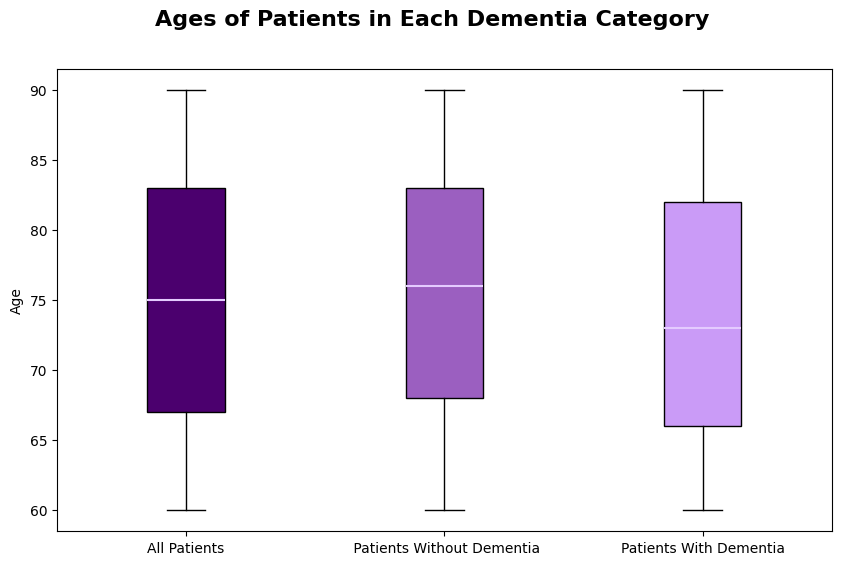

In [19]:
# Create box and whisker plots comparing ages in total, dementia, and non-dementia dfs

# Lists of ages in each category and labels
ages = np.array([df['Age'], df_no['Age'], df_yes['Age']], dtype=object)
ages_labels = ['All Patients', ' Patients Without Dementia', 'Patients With Dementia']

# Set up fig, ax
fig, ax = plt.subplots(1,1,figsize=(10,6))
fig.suptitle('Ages of Patients in Each Dementia Category', fontsize=16, weight='bold')

# Distribution of ages in each category
bplot = ax.boxplot(ages, labels=ages_labels, patch_artist=True, medianprops = dict(color=colors[3],linewidth=1.5))
ax.set(ylabel='Age')

# Set colors for plot boxes
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

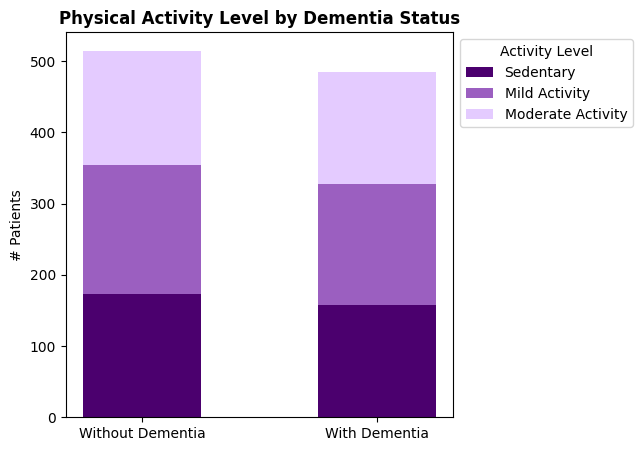

In [20]:
# Stacked bar chart of patient physical activity by dementia status

# Create new dfs of activity levels
df_sed = df[df['Physical_Activity'] == 'Sedentary'].copy()
df_mild = df[df['Physical_Activity'] == 'Mild Activity'].copy()
df_mod = df[df['Physical_Activity'] == 'Moderate Activity'].copy()

# Frequency of dementia in each activity level
sed_cat = df_sed['Dementia'].value_counts().index
sed_counts = df_sed['Dementia'].value_counts().values

mild_cat = df_mild['Dementia'].value_counts().index
mild_counts = df_mild['Dementia'].value_counts().values

mod_cat = df_mod['Dementia'].value_counts().index
mod_counts = df_mod['Dementia'].value_counts().values

# Set fig, ax
fig, ax = plt.subplots(figsize=(5,5))
plt.xticks((0,1), ('Without Dementia', 'With Dementia'))

# Set bar sections to display each of the 3 activity levels: sedentary, mild, moderate
ax.bar(sed_cat, sed_counts, width=0.5, color=colors[0], label='Sedentary')

ax.bar(mild_cat, mild_counts, bottom=sed_counts, width=0.5, color=colors[1], label='Mild Activity')

ax.bar(mod_cat, mod_counts, bottom=(sed_counts+mild_counts), width=0.5, color=colors[3], label='Moderate Activity')

# Set title, labels
ax.set_title('Physical Activity Level by Dementia Status', weight='bold')
ax.tick_params(axis='x')
ax.legend(title='Activity Level', bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylabel('# Patients')

plt.show()

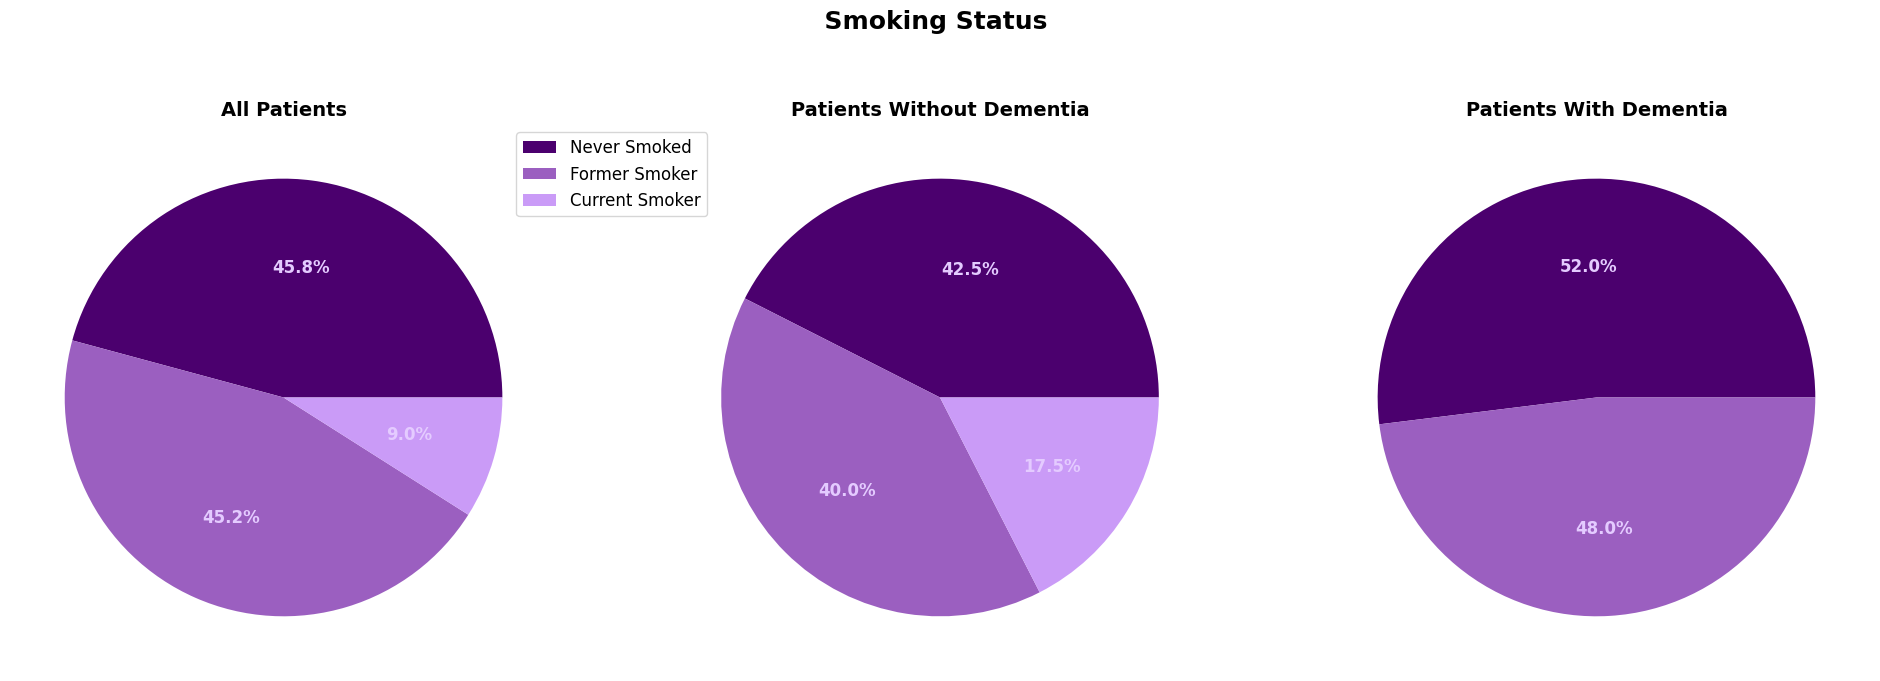

In [21]:
# Create pie charts comparing smoking status in total, dementia, and non-dementia dfs

# Category labels
# labels = df['Smoking_Status'].value_counts().index

# Total population data
all_values = df['Smoking_Status'].value_counts().values
labels = df['Smoking_Status'].value_counts().index

# Non-dementia data
non_values = df_no['Smoking_Status'].value_counts().values
labels_no = df_no['Smoking_Status'].value_counts().index

# Dementia data
yes_values = df_yes['Smoking_Status'].value_counts().values
labels_yes = df_yes['Smoking_Status'].value_counts().index

# Create fig, ax, title
fig, ax = plt.subplots(1,3,figsize=(24,8))
fig.suptitle('      Smoking Status', fontsize=18, weight='bold')

# Pie chart of smoking status in total population
_, _, autopcts = ax[0].pie(all_values, labels=labels, colors=colors, autopct='%1.1f%%', labeldistance=None)
plt.setp(autopcts, **{'color':colors[3], 'weight':'bold', 'fontsize':12})
ax[0].set_title('All Patients', weight='bold', fontsize=14)

# Pie chart of smoking status in population without dementia, create legend for all charts
_, _, autopcts = ax[1].pie(non_values, labels=labels_no, colors=colors, autopct='%1.1f%%', labeldistance=None)
plt.setp(autopcts, **{'color':colors[3], 'weight':'bold', 'fontsize':12})
ax[1].set_title('Patients Without Dementia', weight='bold', fontsize=14)
ax[1].legend(bbox_to_anchor=(-.1, 1), loc='upper center', fontsize=12)

# Pie chart of smoking status in population with dementia
_, _, autopcts = ax[2].pie(yes_values, labels=labels_yes, colors=colors, autopct='%1.1f%%', labeldistance=None)
plt.setp(autopcts, **{'color':colors[3], 'weight':'bold', 'fontsize':12})
ax[2].set_title('Patients With Dementia', weight='bold', fontsize=14)

plt.show()

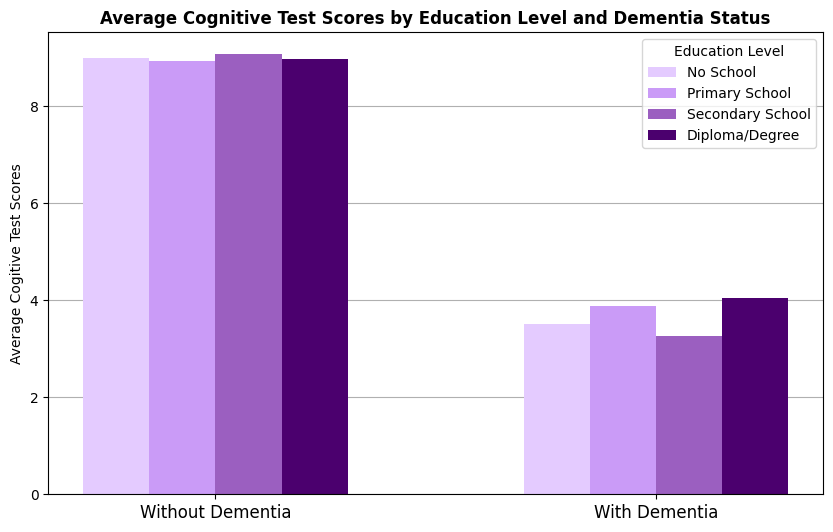

In [22]:
# Grouped bar: Education level vs Average cognitive test scores by dementia status
# x axis= dementia (with or without); y axis=avg cognitive test score
# 2 groups (dementia status) of 4 bars (education levels)

# Dfs for each education level
df_none = df[df['Education_Level'] == 'No School'].copy()
df_prim = df[df['Education_Level'] == 'Primary School'].copy()
df_sec = df[df['Education_Level'] == 'Secondary School'].copy()
df_deg = df[df['Education_Level'] == 'Diploma/Degree'].copy()

# Lists for labels and average cognitive test score for each education level
labels = ['Without Dementia', 'With Dementia']
num = [0,1]
avg_none = []
avg_prim = []
avg_sec = []
avg_deg = []

# Iterate thru education level dfs and append avg for each dementia status
for status in num:
    none_status = df_none[df_none['Dementia'] == status].copy()
    avg_score = none_status['Cognitive_Test_Scores'].mean()
    avg_none.append(avg_score)

    prim_status = df_prim[df_prim['Dementia'] == status].copy()
    avg_score = prim_status['Cognitive_Test_Scores'].mean()
    avg_prim.append(avg_score)

    sec_status = df_sec[df_sec['Dementia'] == status].copy()
    avg_score = sec_status['Cognitive_Test_Scores'].mean()
    avg_sec.append(avg_score)

    deg_status = df_deg[df_deg['Dementia'] == status].copy()
    avg_score = deg_status['Cognitive_Test_Scores'].mean()
    avg_deg.append(avg_score)
    
# Settings for bars
x = np.arange(2)
width = 0.15

# Fig, ax
fig, ax = plt.subplots(figsize=(10, 6))

# Set up bars for each education level
rects1 = ax.bar(x - width, avg_none, width, color=colors[3], label='No School', linewidth=1)
rects2 = ax.bar(x, avg_prim, width, color=colors[2], label='Primary School', linewidth=1)
rect3 = ax.bar(x + width, avg_sec, width, color=colors[1], label='Secondary School', linewidth=1)
rects4 = ax.bar(x + 2*width, avg_deg, width, color=colors[0], label='Diploma/Degree', linewidth=1)

# Ax, legend settings
ax.set_title('Average Cognitive Test Scores by Education Level and Dementia Status', weight='bold')
ax.set_xticks(x + width/2)
ax.set_ylabel('Average Cogitive Test Scores')
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.grid(True)
ax.set_axisbelow(True)
ax.legend(title='Education Level')
plt.show()

### CLUSTERING ###  

- Weight vs cognitive test scores  
- Age vs cognitive test scores  

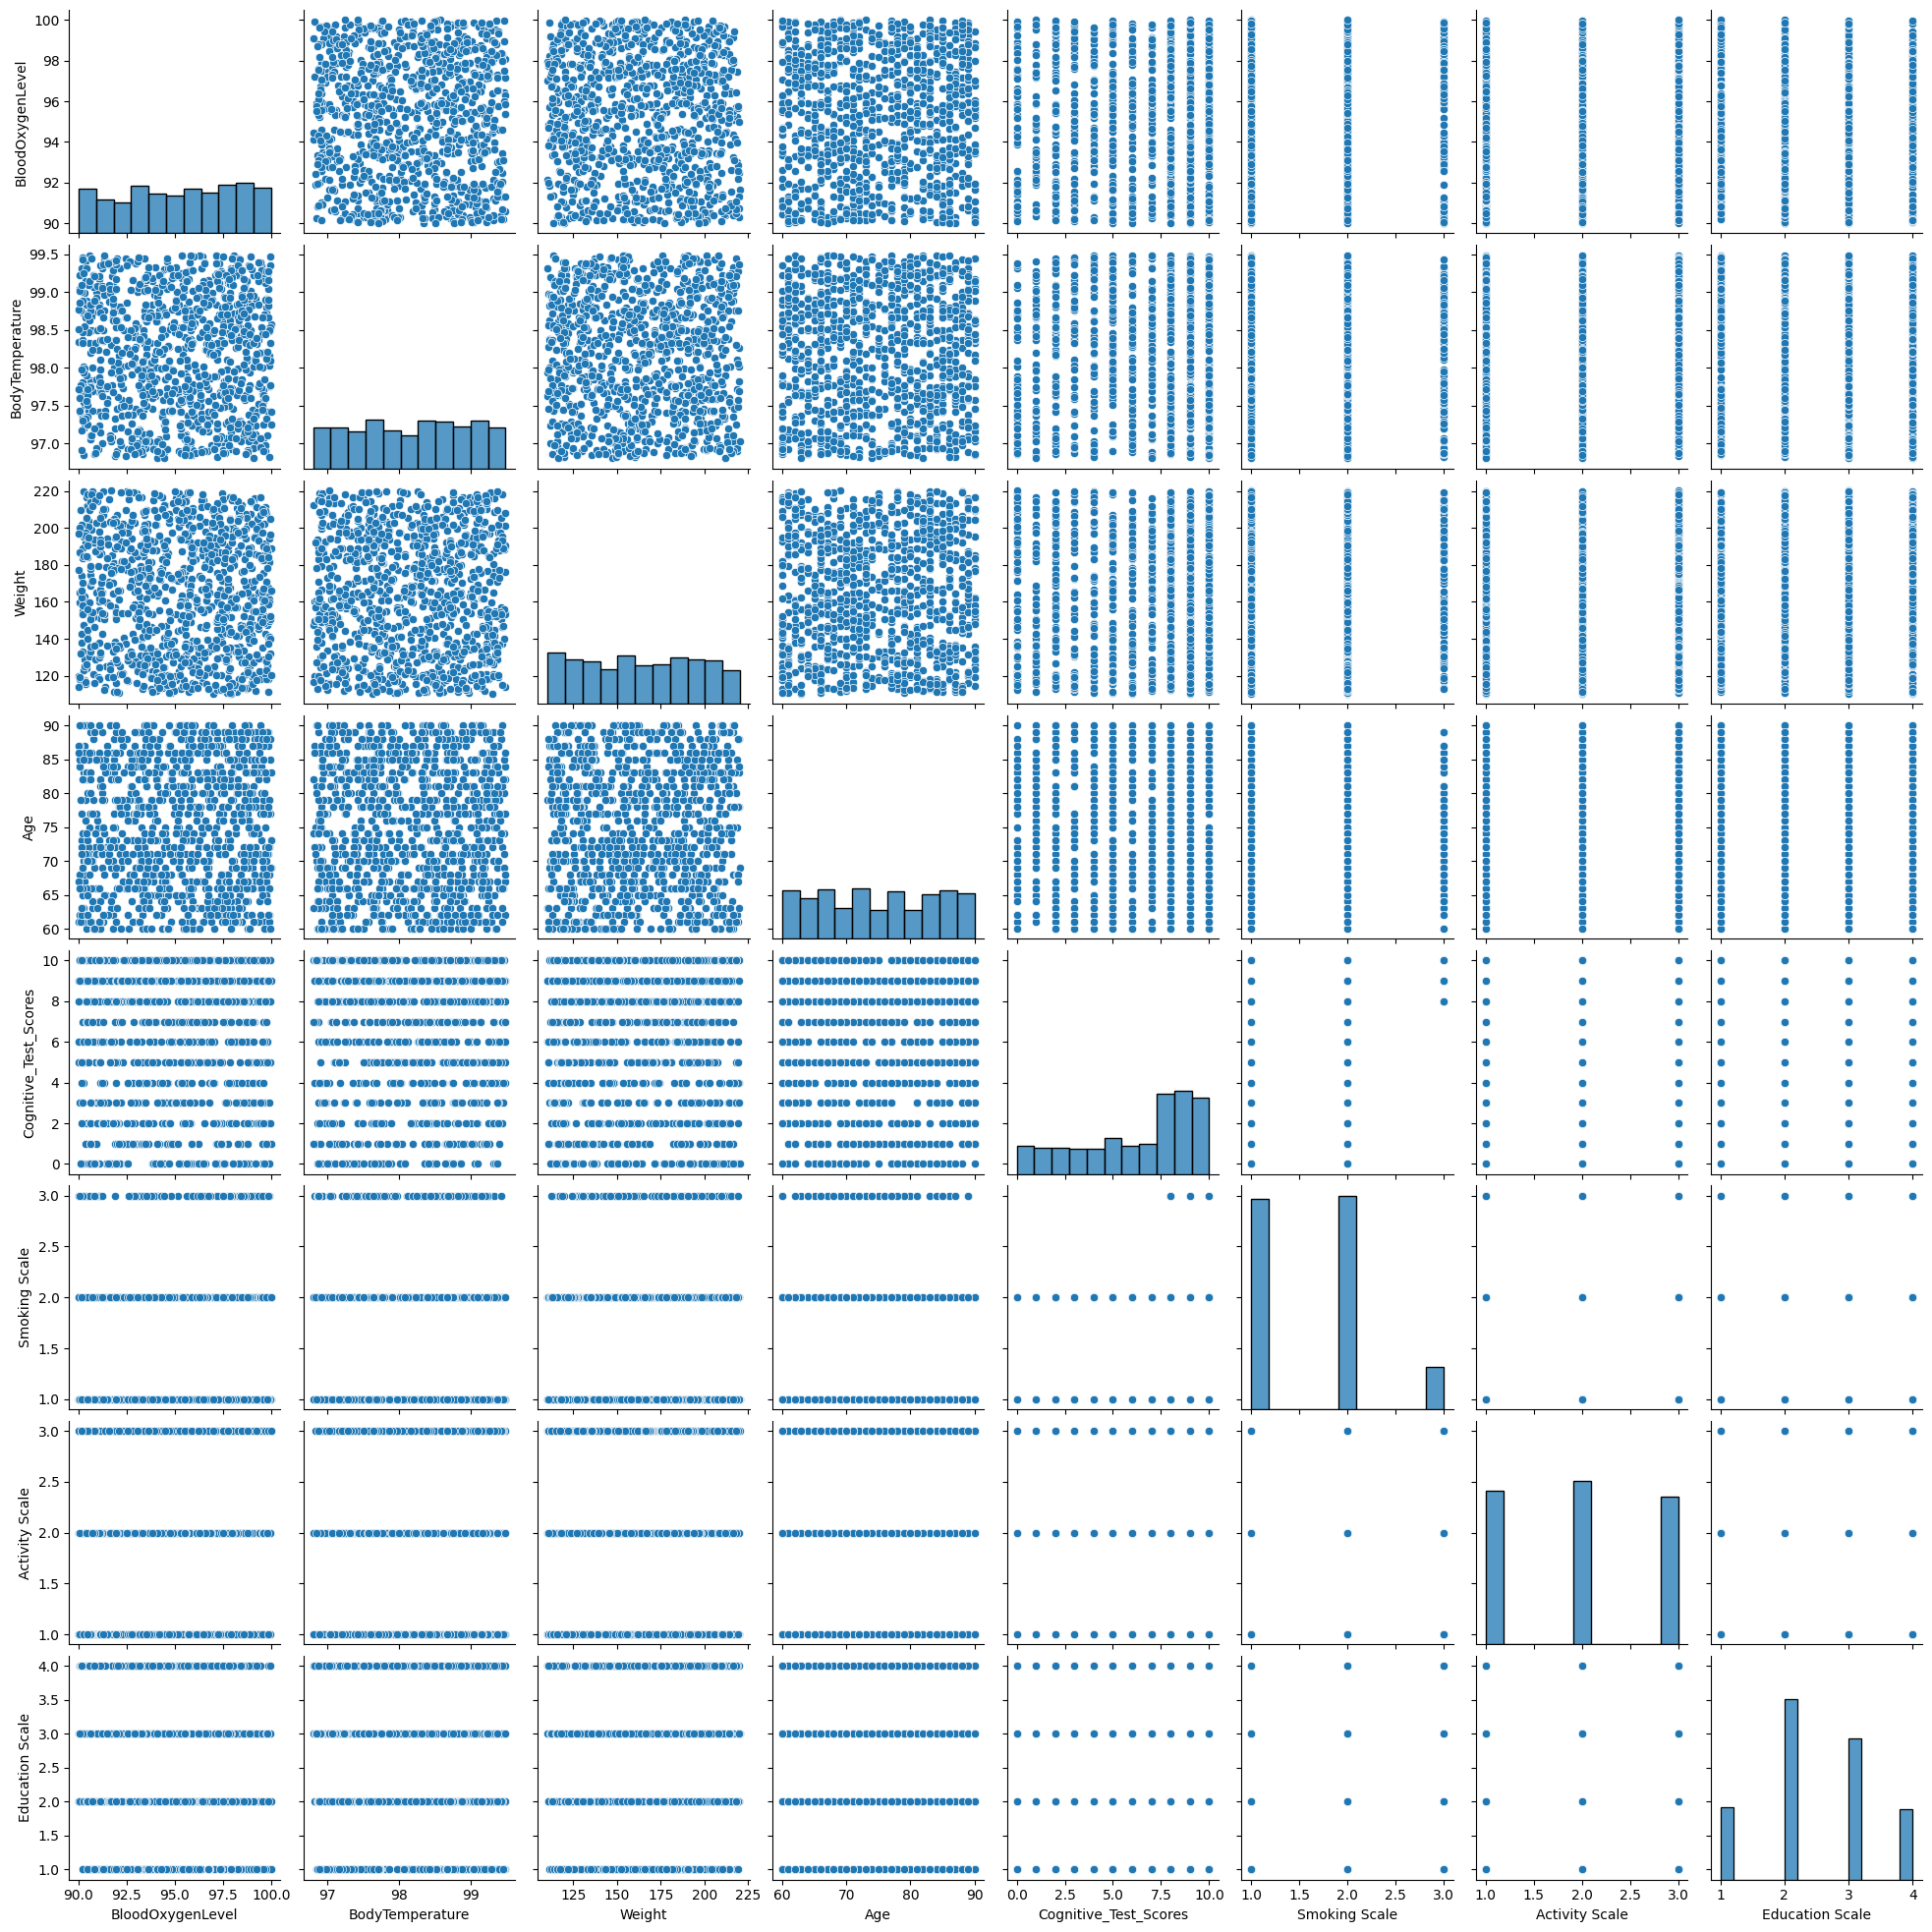

In [23]:
# Pairplot overview using dataset of all patients
# Create new df with numeric-only columns
df2 = df[['BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Age', 'Cognitive_Test_Scores',
          'Smoking Scale', 'Activity Scale', 'Education Scale']].copy()

# Display pairplots for numeric dataset columns
sns.pairplot(df2)

Text(0, 0.5, 'Cognitive_Test_Scores')

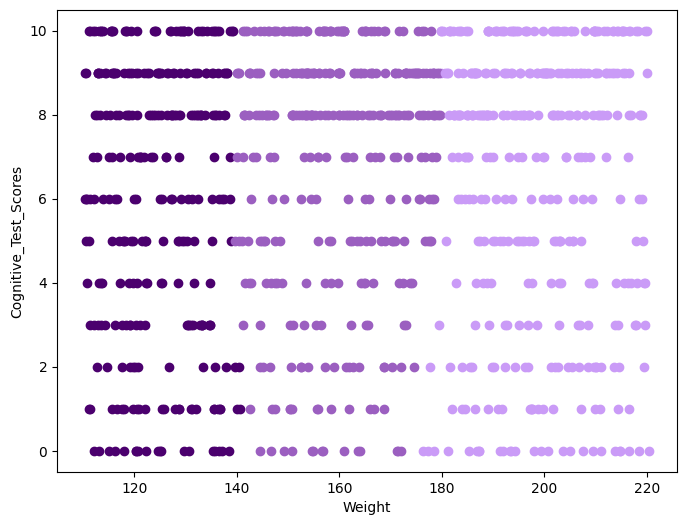

In [24]:
# Clustering on Cognitive Test Scores vs Weight (Total Population)
from sklearn.cluster import SpectralClustering 

clusters = SpectralClustering(n_clusters=3)

clustering = clusters.fit(df[['Weight', 'Cognitive_Test_Scores']])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in df.index:
    ax.scatter(df['Weight'][i], df['Cognitive_Test_Scores'][i], color=colors[clustering.labels_[i]])

ax.set_xlabel('Weight')
ax.set_ylabel('Cognitive_Test_Scores')

Text(0, 0.5, 'Cognitive_Test_Scores')

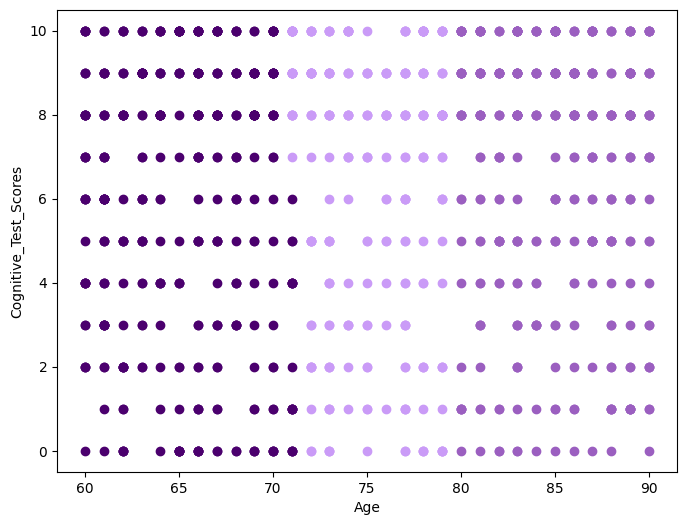

In [25]:
# Variant 1: Clustering on Cognitive Test Scores vs Age (Total Population)
from sklearn.cluster import MeanShift 

clusters = MeanShift()

clustering = clusters.fit(df[['Age', 'Cognitive_Test_Scores']])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in df.index:
    ax.scatter(df['Age'][i], df['Cognitive_Test_Scores'][i], color=colors[clustering.labels_[i]])

ax.set_xlabel('Age')
ax.set_ylabel('Cognitive_Test_Scores')

Text(0, 0.5, 'Cognitive_Test_Scores')

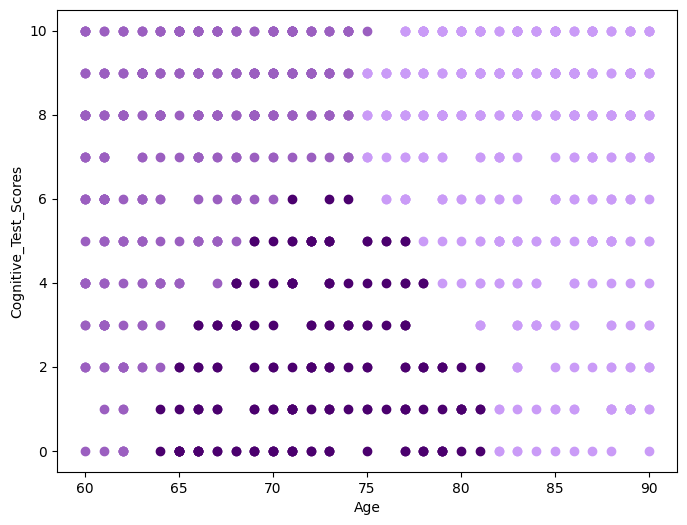

In [26]:
# Variant 2: Clustering on Cognitive Test Scores vs Age (Total Population)
from sklearn.cluster import SpectralClustering 

clusters = SpectralClustering(n_clusters=3)

clustering = clusters.fit(df[['Age', 'Cognitive_Test_Scores']])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in df.index:
    ax.scatter(df['Age'][i], df['Cognitive_Test_Scores'][i], color=colors[clustering.labels_[i]])

ax.set_xlabel('Age')
ax.set_ylabel('Cognitive_Test_Scores')

### REGRESSION ###   

Perform regression analysis to assess if variables are correlated with cognitive test scores (as predictor of dementia status)  
- APOE status vs Cognitive test scores  
- Weight vs Cognitive test scores  
- Age vs Cognitive test Scores     

MSE was 24.693468299711824
R2 was -115.27897524868537


<Axes: xlabel='APOE_ε4 Scale', ylabel='Cognitive_Test_Scores'>

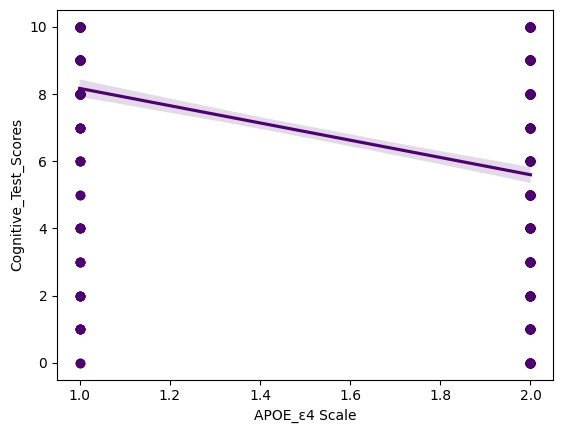

In [27]:
# Define variables to perform regression on: APOE positivity status vs test scores
# Independent=APOE-ε4 Positivity Status
# Dependent=cognitive test scores

X = df[['APOE_ε4 Scale']]
y = df['Cognitive_Test_Scores']

# Create and fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate MSE and R squared
mse = mean_squared_error(X, y_pred)
r2 = r2_score(X, y_pred)

# Display MSE and R2
print('MSE was', mse)
print('R2 was', r2)

# Plot Seaborn regression
sns.regplot(x=X, y=y, color=colors[0])

MSE was 25803.989615705425
R2 was -24.40395881786301


<Axes: xlabel='Weight', ylabel='Cognitive_Test_Scores'>

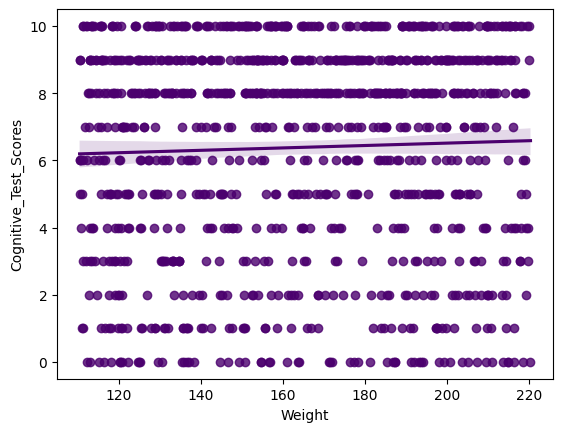

In [28]:
# Variant 1: Define variables to perform regression on: weight vs test scores
# Independent= weight
# Dependent= cognitive test scores (good predictor of dementia status)

X = df[['Weight']]
y = df['Cognitive_Test_Scores']

# Create and fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate MSE and R squared
mse = mean_squared_error(X, y_pred)
r2 = r2_score(X, y_pred)

# Display MSE and R2
print('MSE was', mse)
print('R2 was', r2)

# Plot regression
sns.regplot(x=X, y=y, color=colors[0])

MSE was 25803.989615705425
R2 was -24.40395881786301


<Axes: xlabel='Weight', ylabel='Cognitive_Test_Scores'>

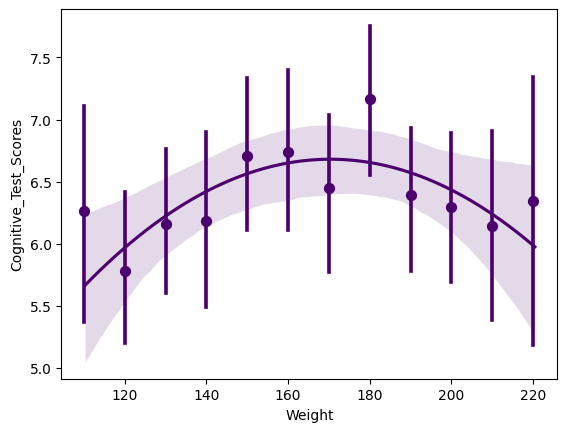

In [29]:
# Variant 2: Define variables to perform regression on: weight vs test scores
# Independent= weight
# Dependent= cognitive test scores

X = df[['Weight']]
y = df['Cognitive_Test_Scores']

# Create and fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate MSE and R squared
mse = mean_squared_error(X, y_pred)
r2 = r2_score(X, y_pred)

# Display MSE and R2
print('MSE was', mse)
print('R2 was', r2)

# Plot regression on the mean: binned and aggregated on weight
sns.regplot(x=X, y=y, x_bins=np.arange(110, 225, 10), order=2, color=colors[0])

MSE was 4774.732343550878
R2 was -56.77921964603202


<Axes: xlabel='Age', ylabel='Cognitive_Test_Scores'>

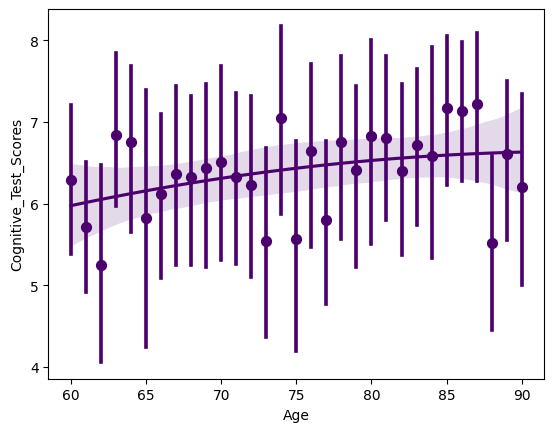

In [30]:
# Define variables to perform regression on: age vs test scores
# Independent= age
# Dependent= cognitive test scores

X = df[['Age']]
y = df['Cognitive_Test_Scores']

# Create and fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate MSE and R squared
mse = mean_squared_error(X, y_pred)
r2 = r2_score(X, y_pred)

# Display MSE and R2
print('MSE was', mse)
print('R2 was', r2)

# Plot regression on mean: aggregated over distinct ages
sns.regplot(x=X, y=y, x_estimator=np.mean, order=2, color=colors[0])